<a href="https://colab.research.google.com/github/ian-espejo/HitSongScience-Project/blob/main/Series(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [272]:
data = pd.read_csv('/content/Indice.csv')
data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [273]:
df = data.copy()

In [274]:
df.dtypes

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [275]:
df.date = pd.to_datetime(df.date, dayfirst=True)
df.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [276]:
df.set_index('date', inplace=True)
df

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


<Axes: xlabel='date', ylabel='spx'>

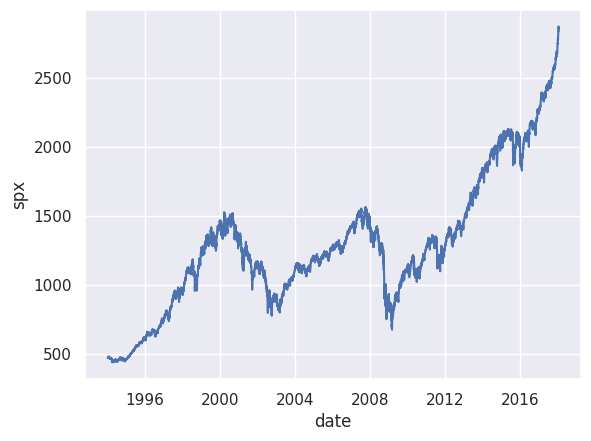

In [277]:
sn.lineplot(x=df.index, y=df.spx)

In [278]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,spx,dax,ftse,nikkei
spx,1.000000,0.971911,0.903246,0.200011
dax,0.971911,1.000000,0.902839,0.205555
ftse,0.903246,0.902839,1.000000,0.157129
nikkei,0.200011,0.205555,0.157129,1.000000


<Axes: >

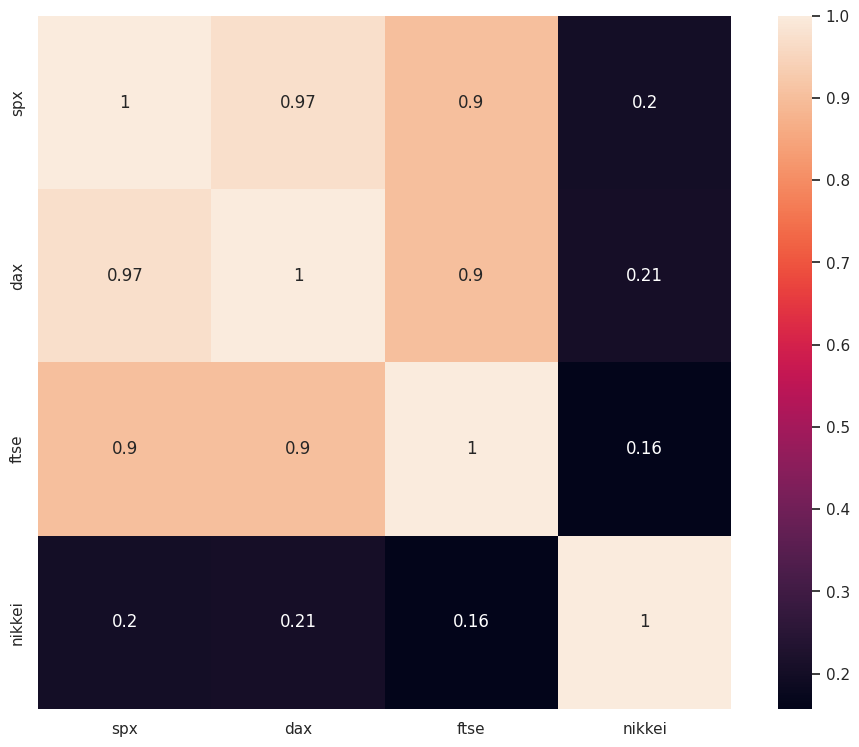

In [279]:
f, ax = plt.subplots(figsize=(12,9))
sn.heatmap(corr, vmax=1, square=True, annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


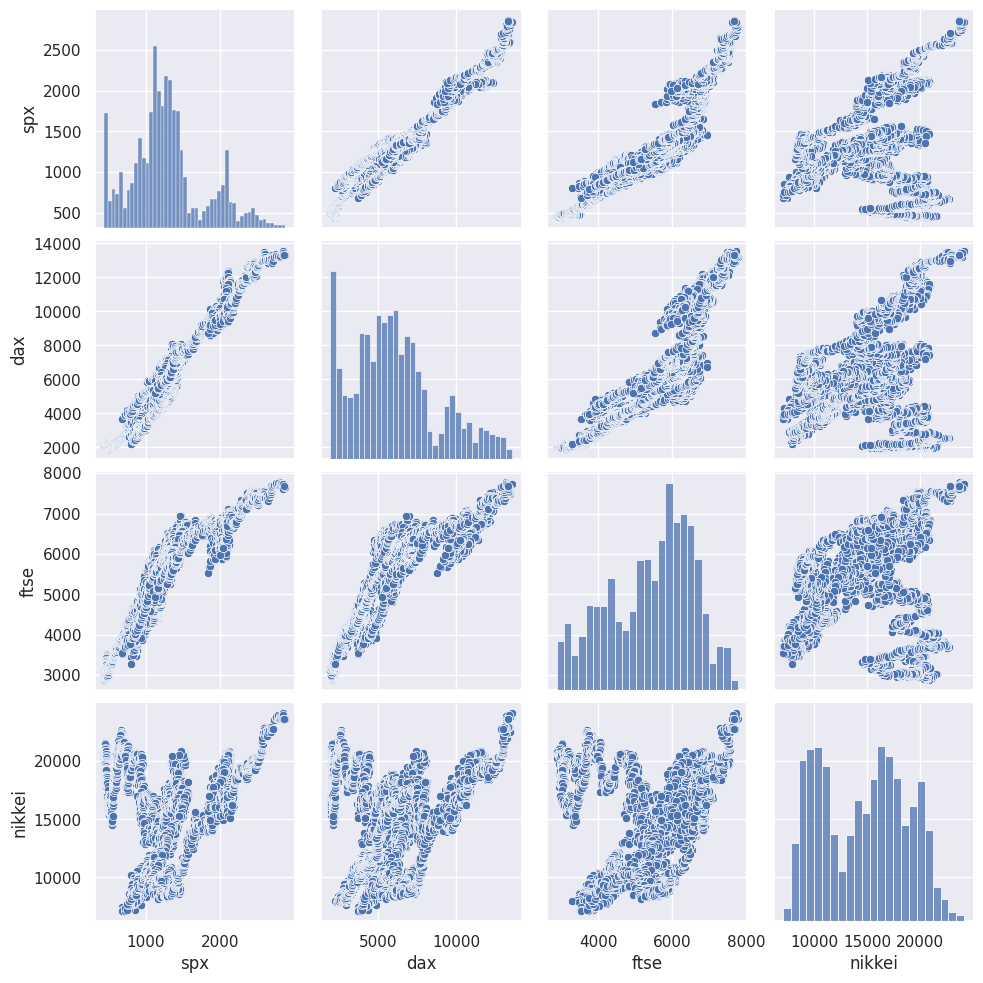

In [280]:
sn.pairplot(df, size=2.5)
plt.show()

<Axes: ylabel='date'>

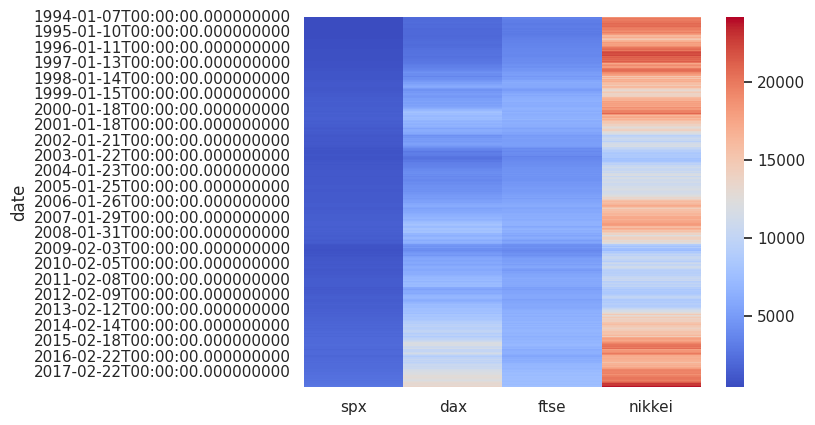

In [281]:
sn.heatmap(df, cmap='coolwarm')

In [282]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


<Axes: >

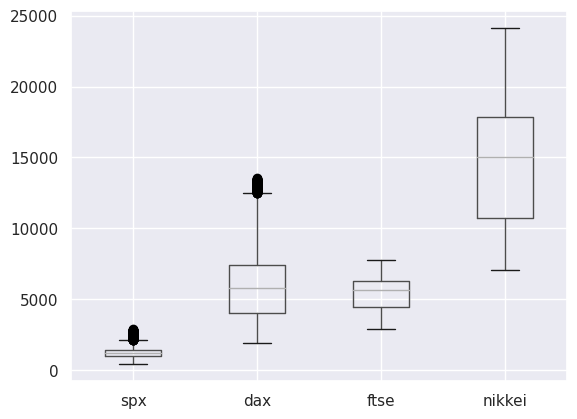

In [283]:
df.boxplot()

<Axes: >

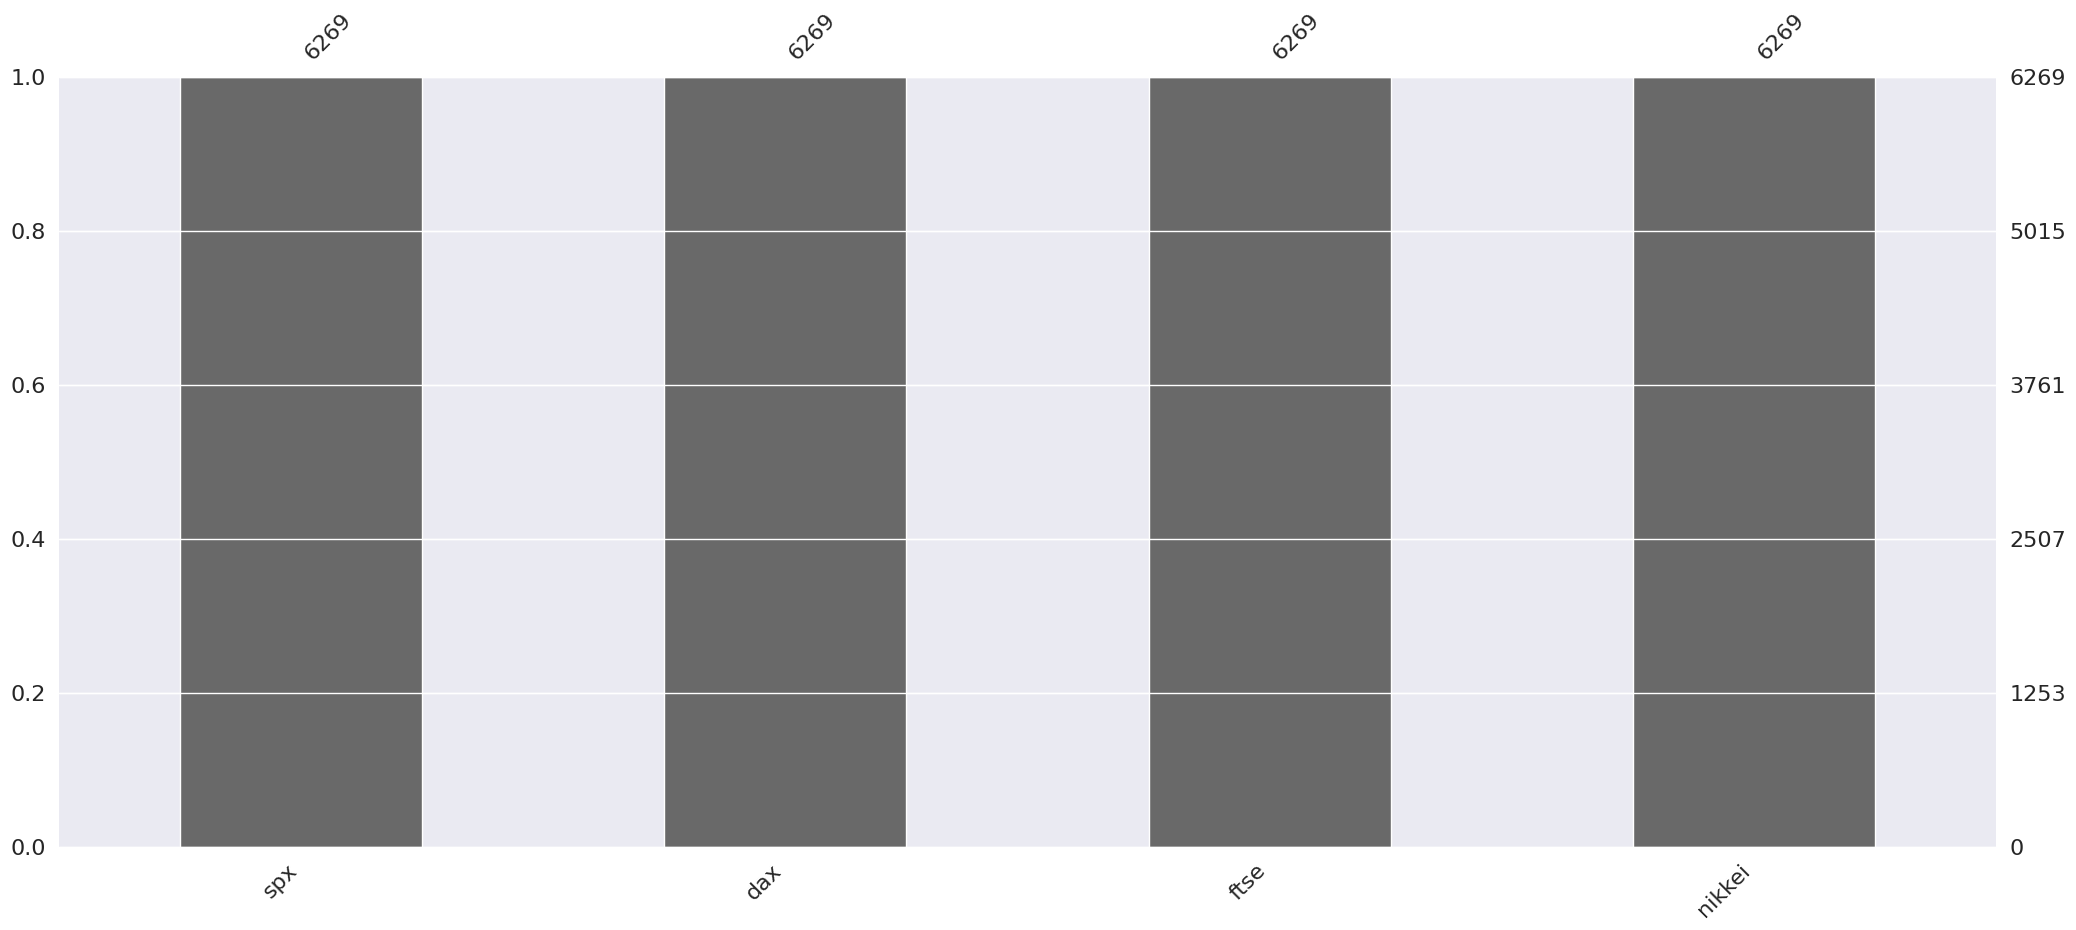

In [284]:
import missingno as ms
ms.bar(df)

<Axes: >

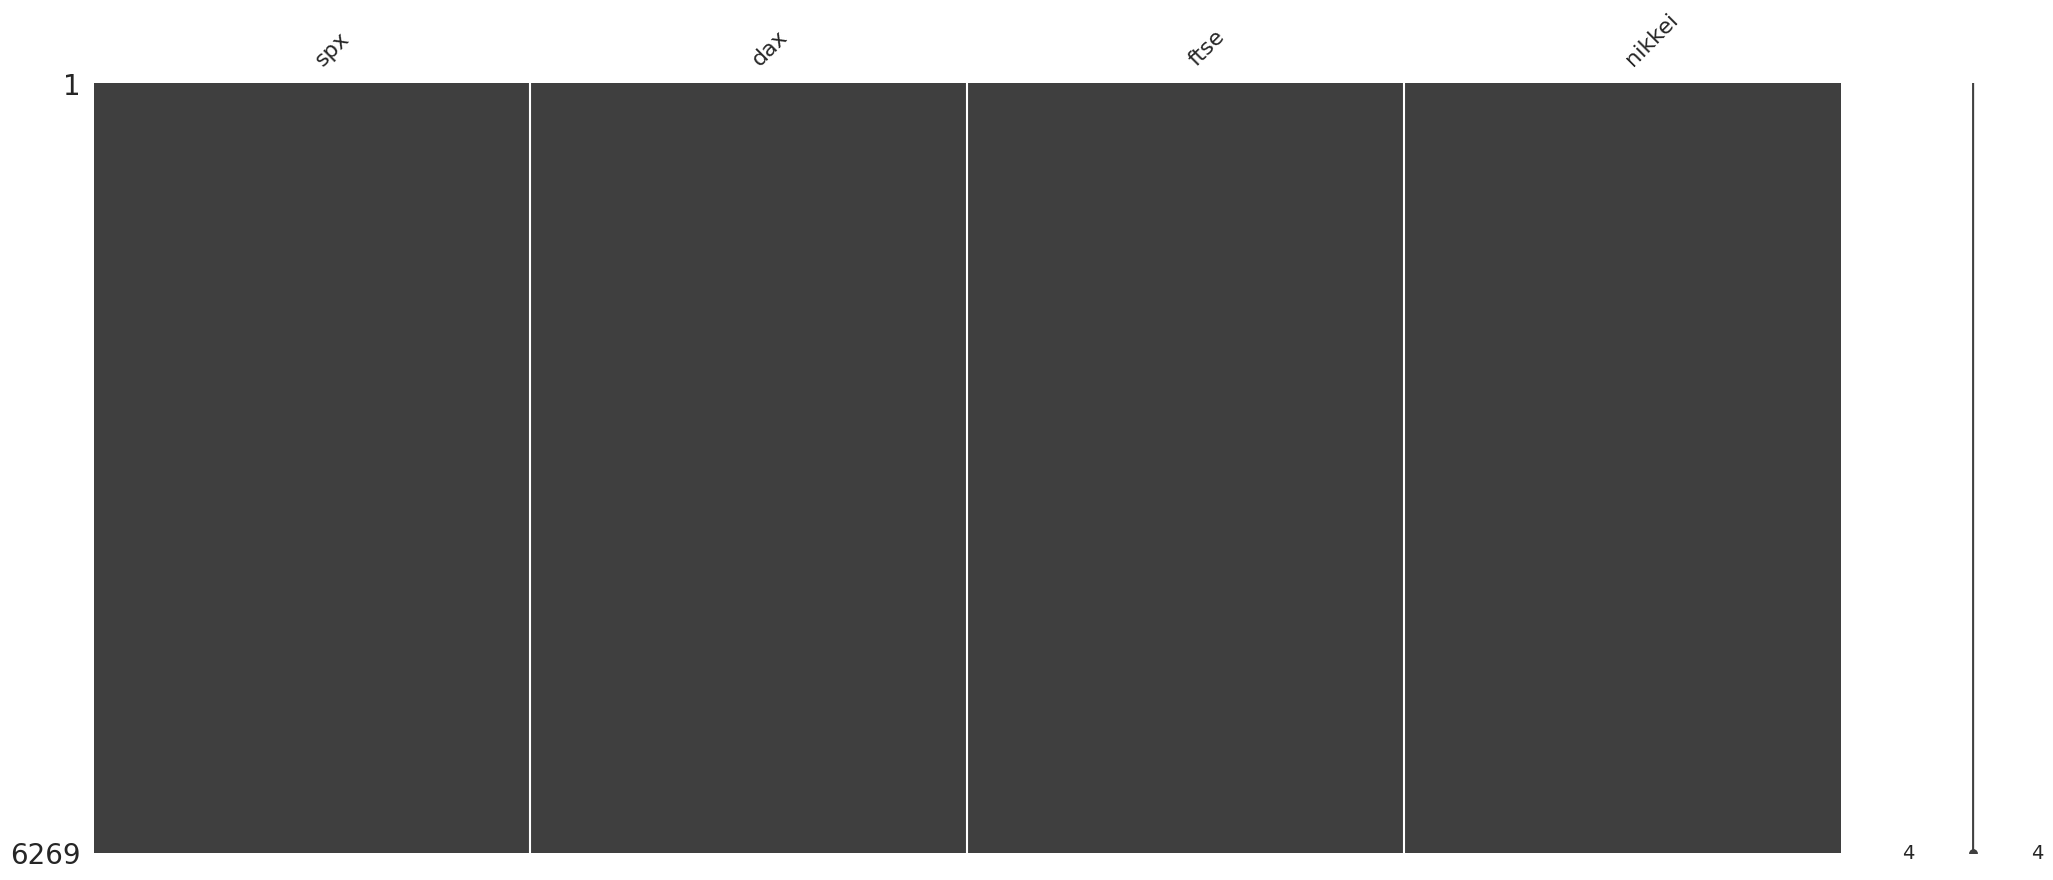

In [285]:
ms.matrix(df)

In [286]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

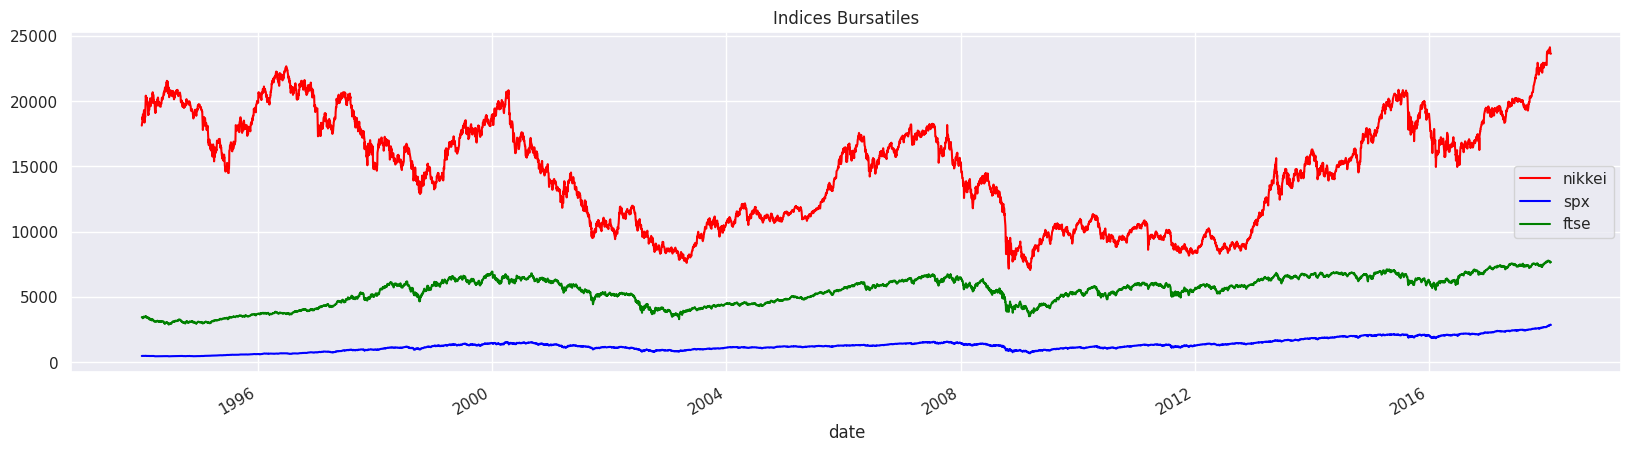

In [287]:
df.nikkei.plot(figsize=(20,5), title='Precios Nikkei', color='red')
df.spx.plot(figsize=(20,5), title='Precios S&P500', color='blue')
df.ftse.plot(figsize=(20,5), title='Precios FTSE100', color='green')
plt.title('Indices Bursatiles')
plt.legend()
plt.show()

In [288]:
df.skew()

spx       0.630421
dax       0.623207
ftse     -0.382900
nikkei    0.025756
dtype: float64

<ipython-input-289-dad1eafa3c8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df.skew(), axlabel='skewness')


<Axes: xlabel='skewness', ylabel='Density'>

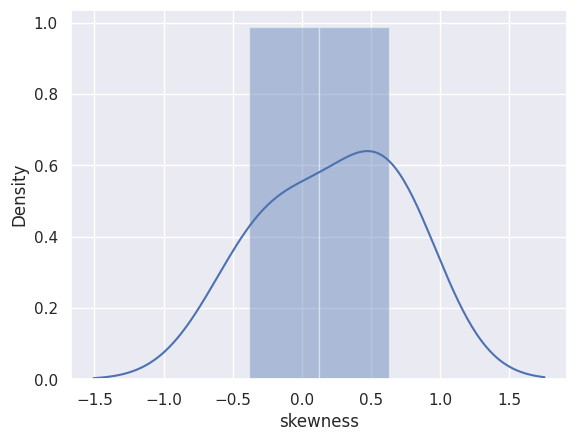

In [289]:
sn.distplot(df.skew(), axlabel='skewness')

In [290]:
df.kurtosis()

spx       0.212285
dax      -0.198897
ftse     -0.746117
nikkei   -1.198919
dtype: float64

<ipython-input-291-f6b26578fb80>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df.kurtosis(), axlabel='kurtosis')


<Axes: xlabel='kurtosis', ylabel='Density'>

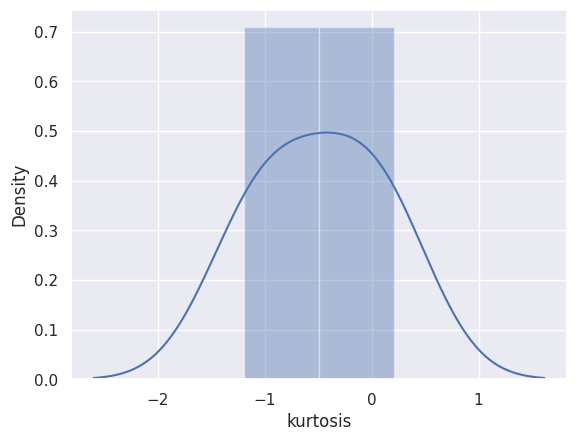

In [291]:
sn.distplot(df.kurtosis(), axlabel='kurtosis')

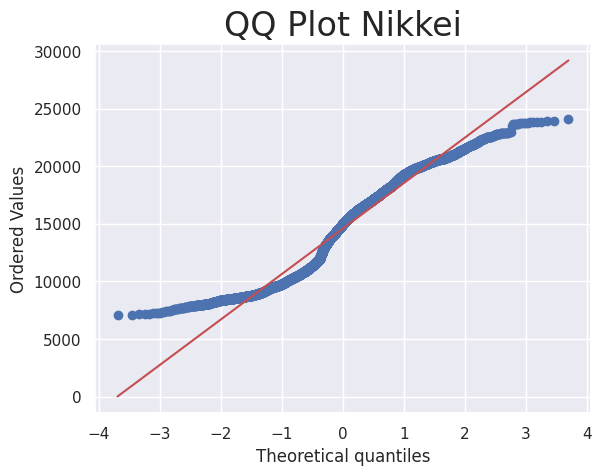

In [292]:
import scipy.stats as ss

ss.probplot(df.nikkei, plot=plt)
plt.title('QQ Plot Nikkei', size=24)
plt.show()

In [293]:
df = df.asfreq('m') #cierre de mes

In [294]:
df = df.asfreq('b') #business day

In [295]:
df.spx = df.spx.fillna(method='ffill') #toma la ultima valida para rellenar los blancos; bfill toma la siguiente

In [296]:
df['market_value'] = df.spx

del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']

In [297]:
df.describe()

,market_value
count,6240.000000
mean,1278.622920
std,475.506265
min,444.270000
25%,974.500896
50%,1239.940000
75%,1468.355174
max,2647.579927


In [298]:
size = int(len(df)*0.8)

df_train = df.iloc[:size]
df_train.head()

,market_value
date,
1994-01-31,481.61
1994-02-01,481.61
1994-02-02,481.61
1994-02-03,481.61
1994-02-04,481.61


In [299]:
df_test = df.iloc[size:]
df_test.head()

,market_value
date,
2013-03-20,1514.678268
2013-03-21,1514.678268
2013-03-22,1514.678268
2013-03-25,1514.678268
2013-03-26,1514.678268


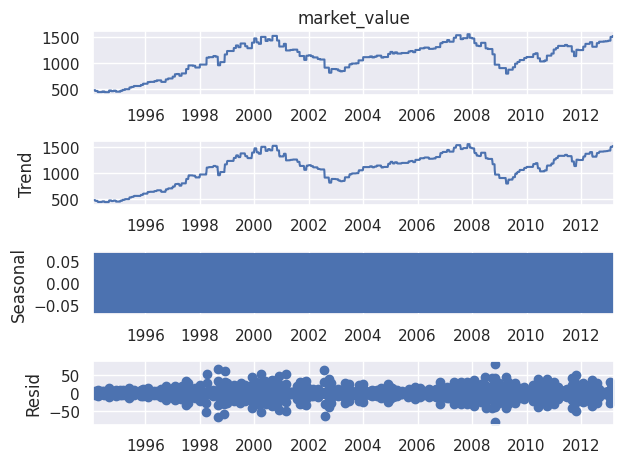

In [300]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

s_desc = seasonal_decompose(df_train.market_value)
s_desc.plot()
plt.show()

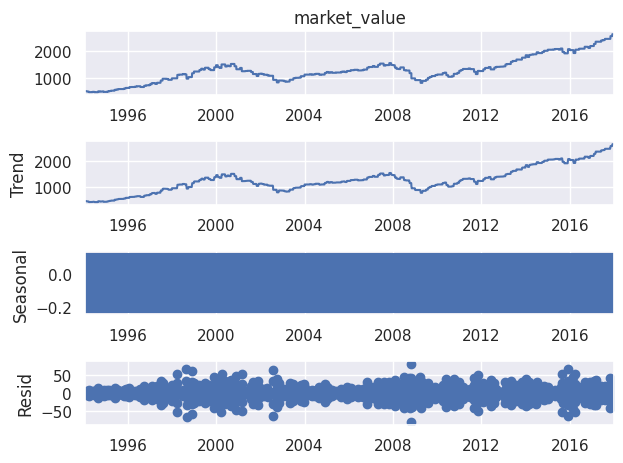

In [301]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()
plt.show()

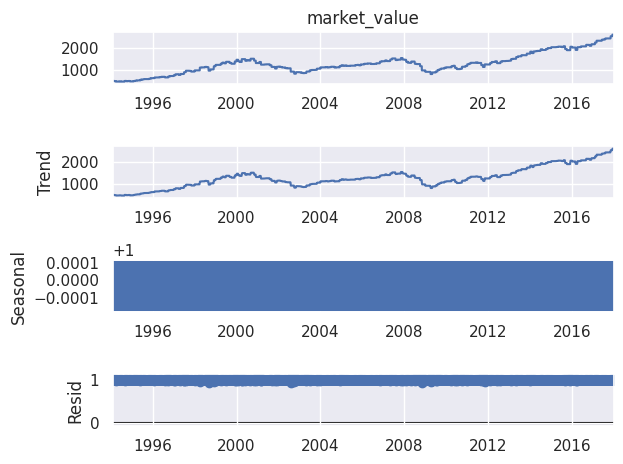

In [302]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model='multiplicative')
s_dec_multiplicative.plot()
plt.show()

In [303]:
df = pd.read_csv('/content/macrodata.csv', index_col=0, parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


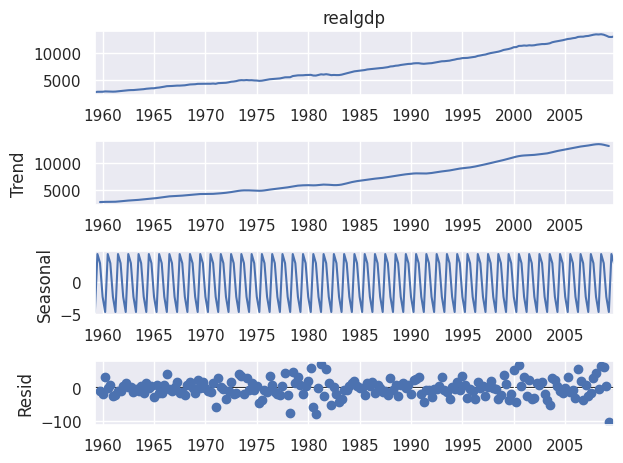

In [304]:
s_dec_additive = seasonal_decompose(df.realgdp, model='additive')
s_dec_additive.plot()
plt.show()

<Axes: >

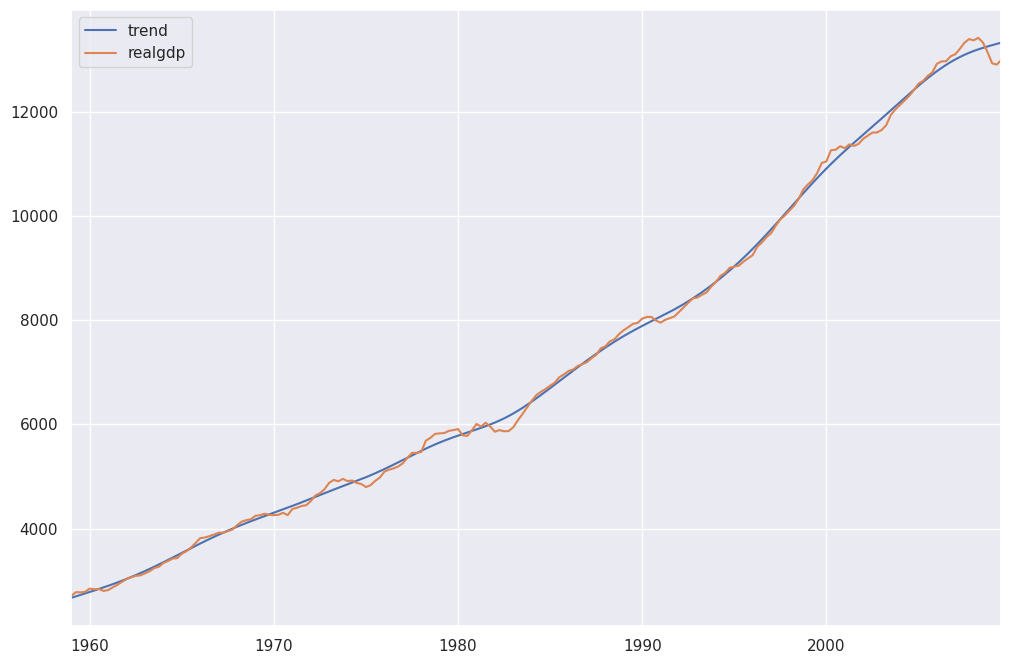

In [305]:
from statsmodels.tsa.filters.hp_filter import hpfilter #Filtro Hodrick Prescot
gdp_cycle, gdp_trend = hpfilter(df.realgdp, lamb=1600)
df['trend'] = gdp_trend
df[['trend', 'realgdp']].plot(figsize=(12,8))

In [306]:
data = pd.read_csv('/content/Indice.csv')
df = data.copy()
df.date = pd.to_datetime(df.date, dayfirst=True)
df.set_index('date', inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')
df['market_value'] = df.ftse
size == int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


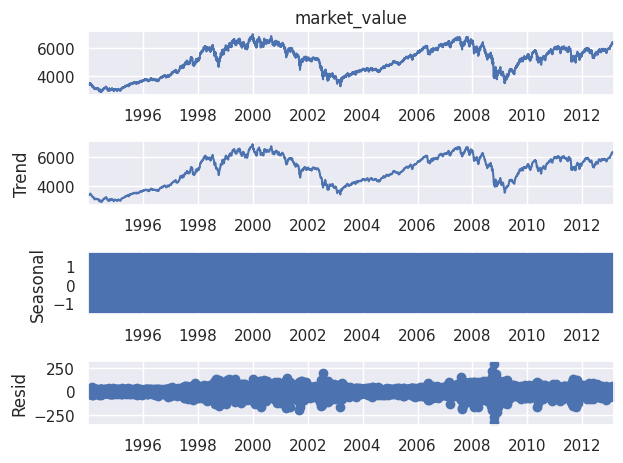

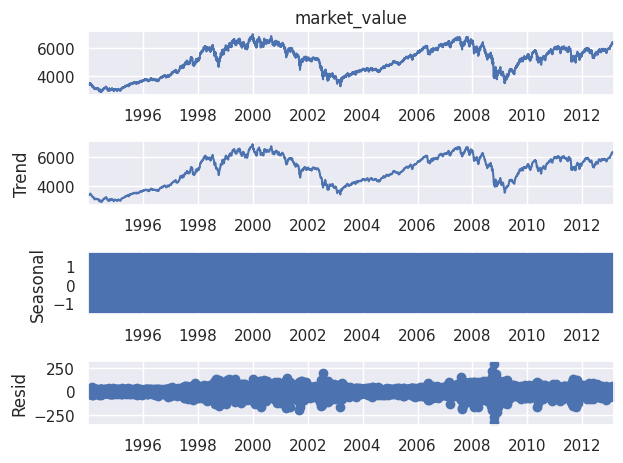

In [307]:
s_desc = seasonal_decompose(df.market_value)
s_desc.plot()

In [308]:
white_noise = np.random.normal(loc=df.market_value.mean(),
                               scale=df.market_value.std(),
                               size=len(df))

df['wn'] = white_noise

df.describe()

,spx,dax,ftse,nikkei,market_value,wn
count,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000,4992.000000
mean,1088.996708,4967.378001,5081.949054,13885.905240,5081.949054,5091.706224
std,291.316837,1705.560735,1015.013972,4043.753615,1015.013972,1026.594118
min,438.920000,1911.700000,2876.600000,7054.980000,2876.600000,1780.293229
25%,913.000000,3727.430000,4271.620000,10212.332500,4271.620000,4399.011271
50%,1142.684437,5104.630000,5261.585000,13565.855000,5261.585000,5079.858293
75%,1314.505903,6316.405000,5908.767500,17275.067500,5908.767500,5775.305397
max,1565.152986,8105.690000,6930.200000,22666.700000,6930.200000,9044.589837


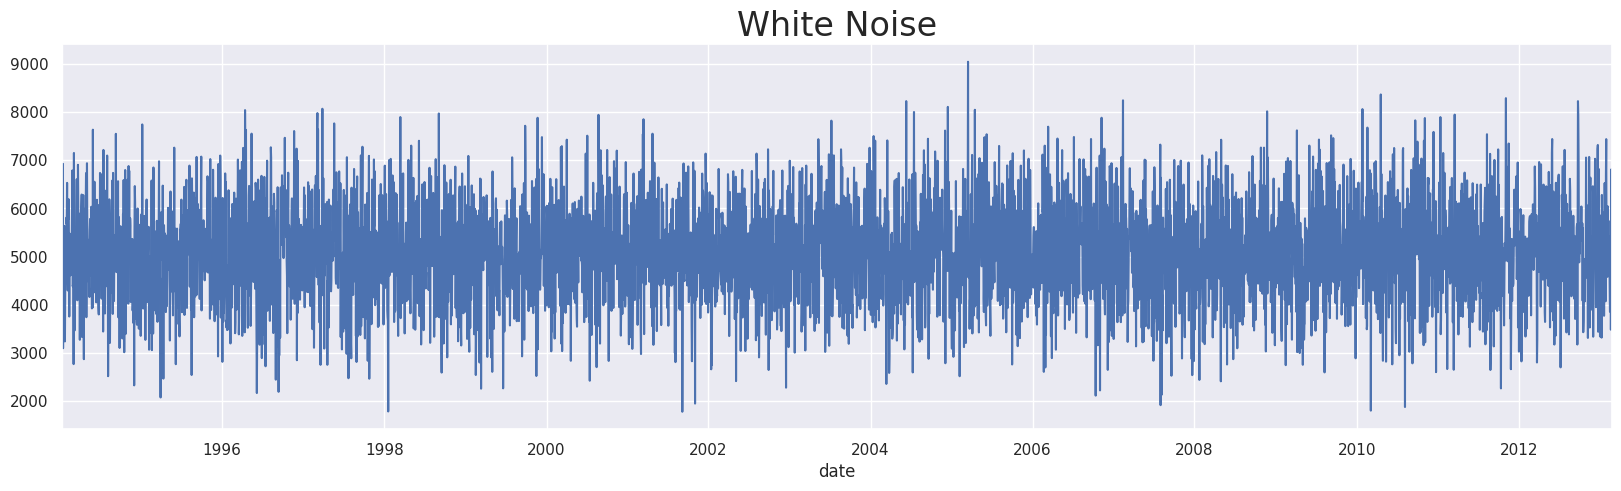

In [309]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise', size=24)
plt.show()

In [310]:
random_walk = pd.read_csv('/content/caminoaleatorio.csv')
rw = random_walk.copy()
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace=True)
rw = rw.asfreq('b')
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [311]:
df['rw'] = rw.price
df.head()

,spx,dax,ftse,nikkei,market_value,wn,rw
date,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,5124.926789,1122.139662
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,5381.937657,1080.347860
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,5251.354085,1082.095245
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,6927.875215,1083.639265
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,3098.376519,1067.146255


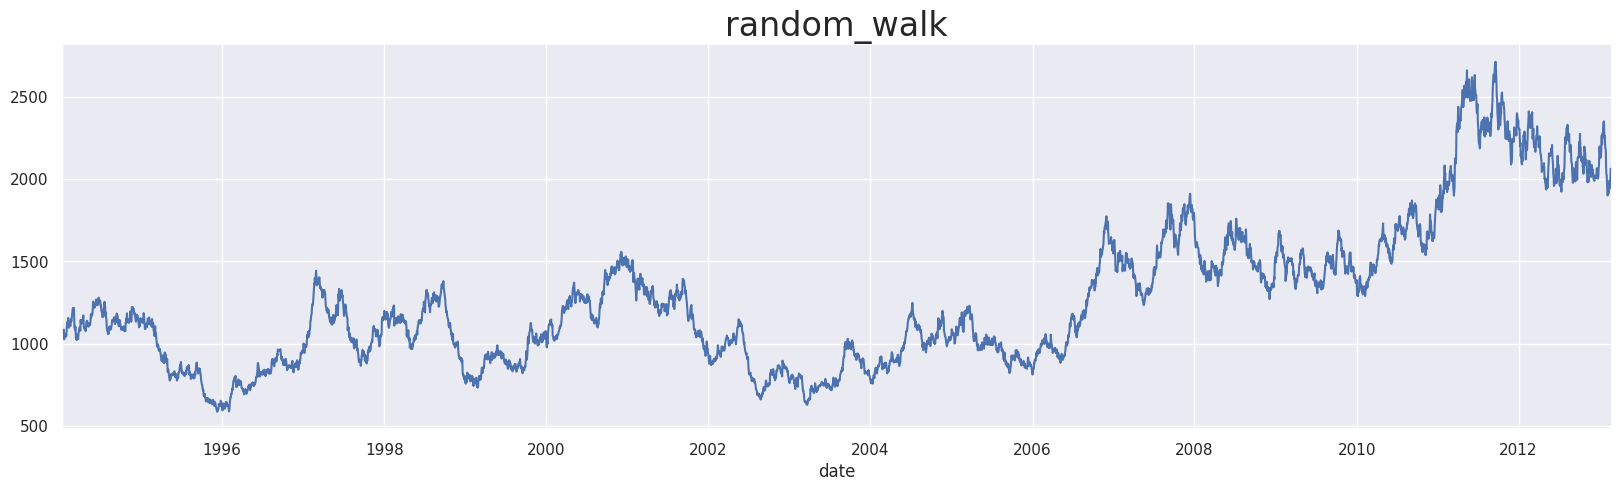

In [312]:
df.rw.plot(figsize=(20,5))
plt.title('random_walk', size=24)
plt.show()

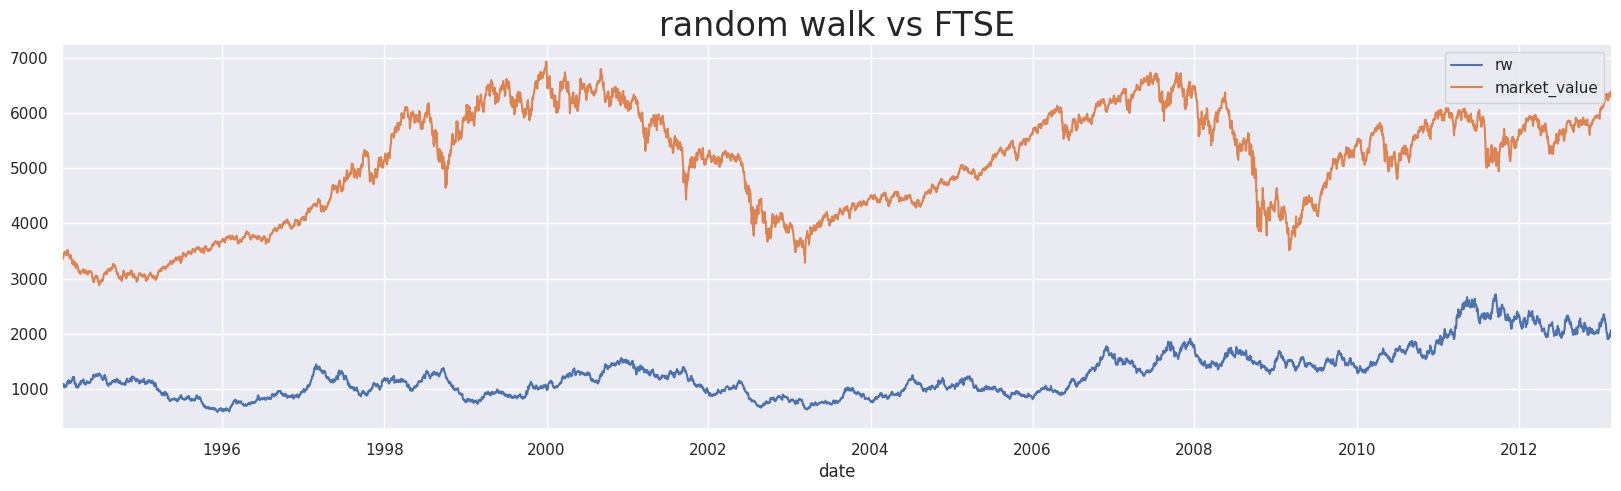

In [313]:
df.rw.plot(figsize=(20,5))
df.market_value.plot()
plt.title('random walk vs FTSE', size=24)
plt.legend()
plt.show()

In [314]:
#Pruebas de estacionariedad

from statsmodels.tsa.stattools import adfuller

#Augmented Dickey-Fuller test
#H0 = no es estacionaria
#Si el estadistico es menor al valor critico se rechaza
#Si el valor p < 0.05 se rechaza

adfuller(df.market_value)

#estadistico
#valor p
#muestras
#valores criticos segun nivel de confianza

#No se rechaza porque el estadistico > valores criticos & valor p > 0.1,0.05,0.01

(-1.8744057797450582,
 0.34419555106503297,
 6,
 4985,
 {'1%': -3.4316624715142177,
  '5%': -2.862119970102166,
  '10%': -2.5670787188546584},
 54547.56682116877)

In [315]:
def adf_test(series):
  result = adfuller(series, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}')
  print(f'n_lags: {result[2]}')
  for key, value in result[4].items():
    print('Critical values:')
    print(f'  {key}, {value}')
  #print(f'Result: The series is {'not ' if result[1] > 0.05 else ''}stationary')

adf_test(df.market_value)

ADF Statistic: -1.8744057797450582
p-value: 0.34419555106503297
n_lags: 6
Critical values:
  1%, -3.4316624715142177
Critical values:
  5%, -2.862119970102166
Critical values:
  10%, -2.5670787188546584


In [316]:
adf_test(df.wn)

ADF Statistic: -30.4190398920697
p-value: 0.0
n_lags: 5
Critical values:
  1%, -3.43166220814716
Critical values:
  5%, -2.862119853748156
Critical values:
  10%, -2.567078656914853


In [317]:
adf_test(df.rw)

ADF Statistic: -1.6019664949791077
p-value: 0.48260556143511335
n_lags: 0
Critical values:
  1%, -3.4316608928957413
Critical values:
  5%, -2.862119272677694
Critical values:
  10%, -2.5670783475882715


In [318]:
from statsmodels.tsa.stattools import kpss

#Prueba de KPSS
#H0 la serie es estacionaria

kpss(df.market_value)
#se rechaza

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(2.8664611652505885,
 0.01,
 42,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

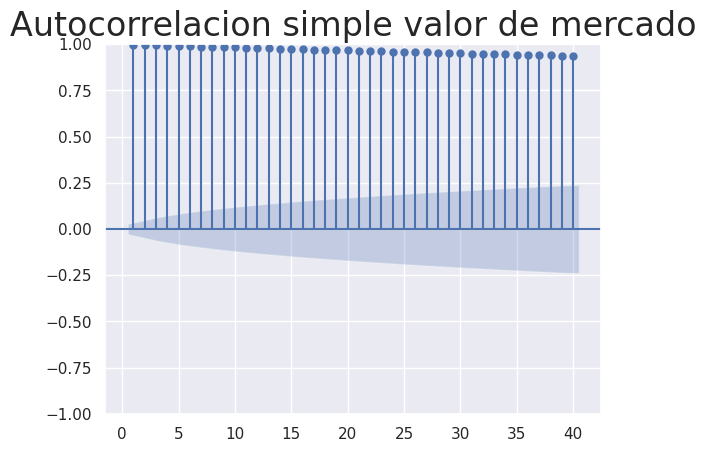

In [319]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title('Autocorrelacion simple valor de mercado', size=24)
plt.show()

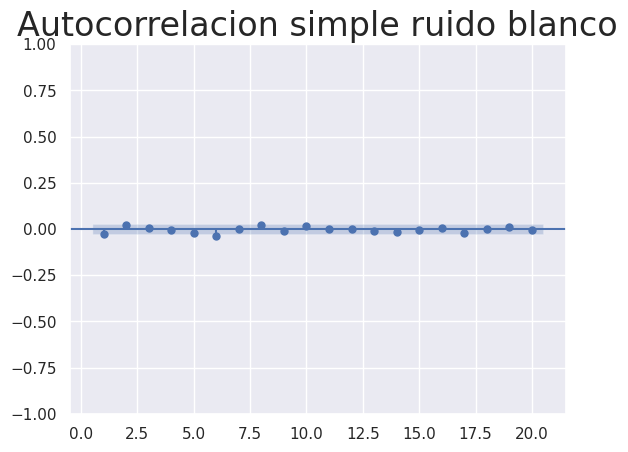

In [320]:
sgt.plot_acf(df.wn, lags=20, zero=False)
plt.title('Autocorrelacion simple ruido blanco', size=24)
plt.show()

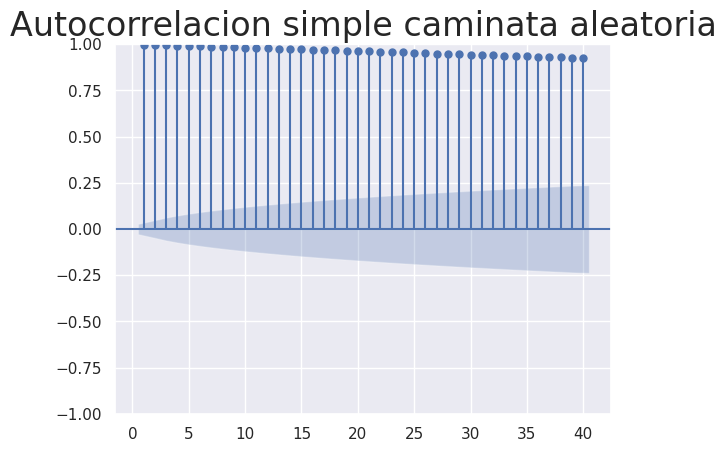

In [321]:
sgt.plot_acf(df.rw, lags=40, zero=False)
plt.title('Autocorrelacion simple caminata aleatoria', size=24)
plt.show()

In [322]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

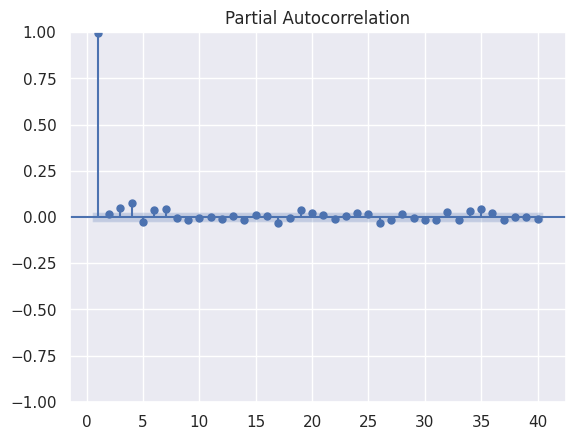

In [323]:
sgt.plot_pacf(df.market_value, lags=40, alpha=0.05, zero=False, method=('ols'))
plt.show()

In [324]:
autoregressive = ARIMA(df.market_value, order=(1,0,0))
#(p,d,q)
#autoregresivo, integracion, promedio movil
ajuste = autoregressive.fit()
print(ajuste.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27469.329
Date:                Wed, 31 May 2023   AIC                          54944.658
Time:                        12:11:46   BIC                          54964.204
Sample:                    01-07-1994   HQIC                         54951.509
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5081.9464    428.618     11.857      0.000    4241.870    5922.022
ar.L1          0.9984      0.001   1139.893      0.000       0.997       1.000
sigma2      3520.1889     41.095     85.659      0.0

In [325]:
autoregressive_2 = ARIMA(df.market_value, order=(2,0,0))
ajuste_2 = autoregressive_2.fit()
print(ajuste_2.summary())

#L1 es significativo porque <0.05 pero L2 no

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27468.677
Date:                Wed, 31 May 2023   AIC                          54945.354
Time:                        12:11:46   BIC                          54971.417
Sample:                    01-07-1994   HQIC                         54954.489
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5081.9491    373.335     13.612      0.000    4350.225    5813.673
ar.L1          0.9811      0.010     99.570      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.741      0.0

In [326]:
autoregressive_3 = ARIMA(df.market_value, order=(3,0,0))
ajuste_3 = autoregressive_3.fit()
print(ajuste_3.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27462.682
Date:                Wed, 31 May 2023   AIC                          54935.364
Time:                        12:11:47   BIC                          54967.942
Sample:                    01-07-1994   HQIC                         54946.783
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5081.9491    383.759     13.243      0.000    4329.796    5834.102
ar.L1          0.9803      0.010     98.779      0.000       0.961       1.000
ar.L2         -0.0311      0.013     -2.323      0.0

In [327]:
#prueba de razon de verosimilitud
#H0 los modelos son iguales
#Si p<0.05 se rechaza H0

def LLR_test(mod1, mod2, DF=1):
  L1 = mod1.llf
  L2 = mod2.llf
  LR = 2*(L2-L1)
  p = chi2.sf(LR, DF).round(3)
  return p

LLR_test(ajuste_2, ajuste_3)

#Los modelos son diferentes: es mejor usar el 3

0.001

In [328]:
autoregressive_4 = ARIMA(df.market_value, order=(4,0,0))
ajuste_4 = autoregressive_4.fit()
print(ajuste_4.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27449.210
Date:                Wed, 31 May 2023   AIC                          54910.420
Time:                        12:11:48   BIC                          54949.513
Sample:                    01-07-1994   HQIC                         54924.122
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5081.9491    397.463     12.786      0.000    4302.935    5860.963
ar.L1          0.9767      0.010     97.497      0.000       0.957       0.996
ar.L2         -0.0288      0.013     -2.132      0.0

In [329]:
LLR_test(ajuste_3, ajuste_4) #es mejor usar el 4

0.0

In [330]:
autoregressive_7 = ARIMA(df.market_value, order=(7,0,0))
ajuste_7 = autoregressive_7.fit()
print(ajuste_7.summary())
LLR_test(ajuste, ajuste_7, DF=6)

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27438.751
Date:                Wed, 31 May 2023   AIC                          54895.502
Time:                        12:11:50   BIC                          54954.142
Sample:                    01-07-1994   HQIC                         54916.056
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5081.9491    410.906     12.368      0.000    4276.588    5887.310
ar.L1          0.9784      0.010     95.462      0.000       0.958       0.998
ar.L2         -0.0305      0.014     -2.187      0.0

0.0

In [331]:
#analisis de residuos

df['res_price'] = ajuste_7.resid
df.head()

,spx,dax,ftse,nikkei,market_value,wn,rw,res_price
date,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,5124.926789,1122.139662,-1635.969054
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,5381.937657,1080.347860,-8.486285
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,5251.354085,1082.095245,-29.945617
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,6927.875215,1083.639265,-45.436973
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,3098.376519,1067.146255,-17.457301


In [332]:
#o es estacionaria o tiene tendencia

sts.adfuller(df.res_price) #los residuos son estacionarios

(-75.82001756613842,
 0.0,
 0,
 4991,
 {'1%': -3.4316608928957413,
  '5%': -2.862119272677694,
  '10%': -2.5670783475882715},
 54535.57244893038)

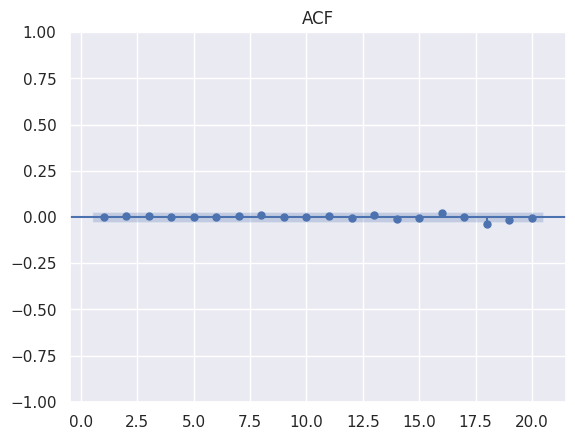

In [333]:
sgt.plot_acf(df.res_price, zero=False, lags=20) #correclacion simple
plt.title('ACF')
plt.show()

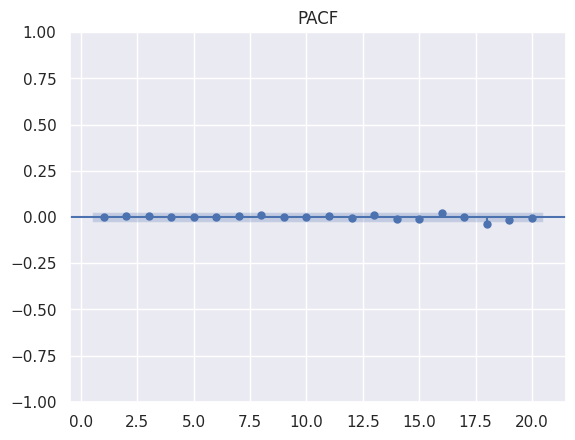

In [334]:
sgt.plot_pacf(df.res_price, zero=False, lags=20, alpha=0.05, method=('ols'))
plt.title('PACF') #correlacion parcial
plt.show()

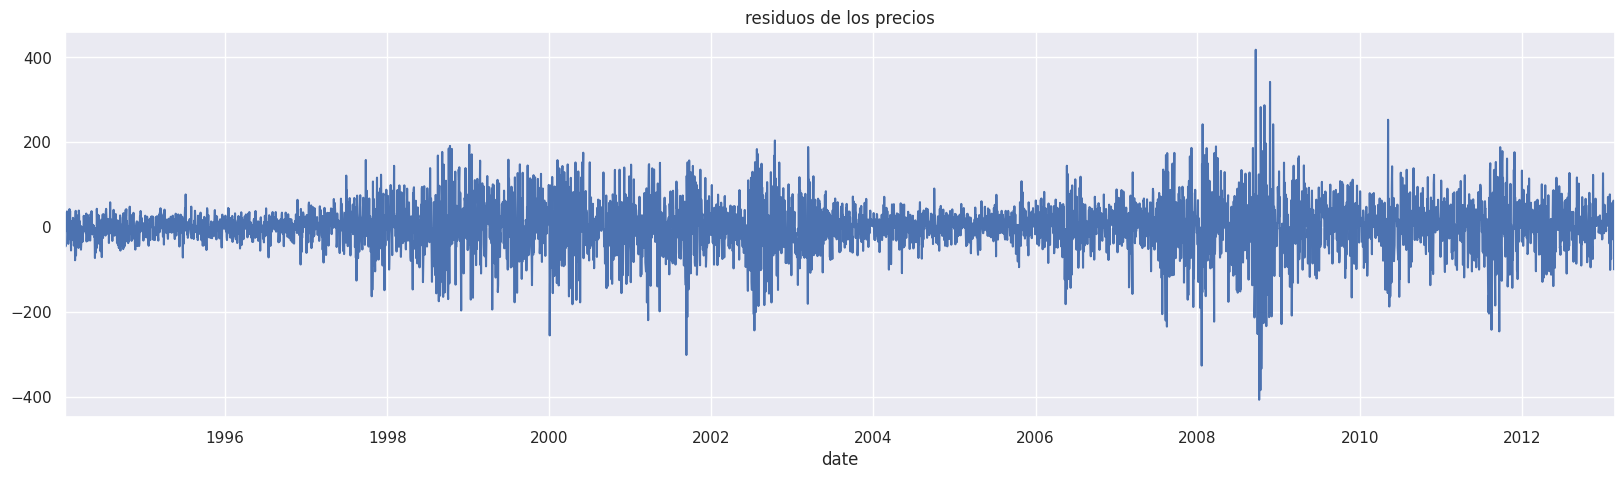

In [335]:
df.res_price[1:].plot(figsize=(20,5))
plt.title('residuos de los precios')
plt.show()

In [336]:
df['log'] = np.log(df.market_value) #penalizacion de los valores altos
df.head()

,spx,dax,ftse,nikkei,market_value,wn,rw,res_price,log
date,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,5124.926789,1122.139662,-1635.969054,8.144964
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,5381.937657,1080.347860,-8.486285,8.143395
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,5251.354085,1082.095245,-29.945617,8.135573
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,6927.875215,1083.639265,-45.436973,8.123267
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,3098.376519,1067.146255,-17.457301,8.119699


In [337]:
df['dif'] = np.log(df.market_value.shift(1)) #shift mueve a la siguiente fila
df['dif1'] = np.log(df.market_value) - np.log(df.market_value.shift(1))
#la difrencia quita la tendencia
df.head()

,spx,dax,ftse,nikkei,market_value,wn,rw,res_price,log,dif,dif1
date,,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,5124.926789,1122.139662,-1635.969054,8.144964,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,5381.937657,1080.347860,-8.486285,8.143395,8.144964,-0.001568
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,5251.354085,1082.095245,-29.945617,8.135573,8.143395,-0.007823
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,6927.875215,1083.639265,-45.436973,8.123267,8.135573,-0.012305
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,3098.376519,1067.146255,-17.457301,8.119699,8.123267,-0.003568


<Axes: xlabel='date'>

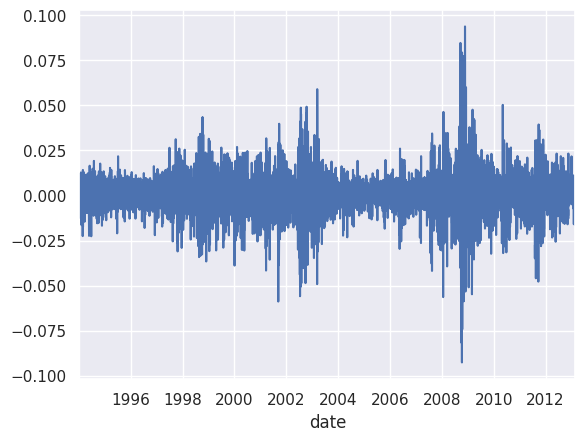

In [338]:
df.dif1.plot()

In [339]:
df['diff_1'] = df.market_value.diff(periods=1) #resta respecto a x periodos atras
df['diff_2'] = df.market_value.diff(periods=2)
df.head()

,spx,dax,ftse,nikkei,market_value,wn,rw,res_price,log,dif,dif1,diff_1,diff_2
date,,,,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,5124.926789,1122.139662,-1635.969054,8.144964,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,5381.937657,1080.347860,-8.486285,8.143395,8.144964,-0.001568,-5.40,NaN
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,5251.354085,1082.095245,-29.945617,8.135573,8.143395,-0.007823,-26.81,-32.21
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,6927.875215,1083.639265,-45.436973,8.123267,8.135573,-0.012305,-41.75,-68.56
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,3098.376519,1067.146255,-17.457301,8.119699,8.123267,-0.003568,-12.01,-53.76


In [340]:
df['returns'] = df.market_value.pct_change(1)*100 #retorno
df.head()

,spx,dax,ftse,nikkei,market_value,wn,rw,res_price,log,dif,dif1,diff_1,diff_2,returns
date,,,,,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,5124.926789,1122.139662,-1635.969054,8.144964,NaN,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,5381.937657,1080.347860,-8.486285,8.143395,8.144964,-0.001568,-5.40,NaN,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,5251.354085,1082.095245,-29.945617,8.135573,8.143395,-0.007823,-26.81,-32.21,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,6927.875215,1083.639265,-45.436973,8.123267,8.135573,-0.012305,-41.75,-68.56,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,3098.376519,1067.146255,-17.457301,8.119699,8.123267,-0.003568,-12.01,-53.76,-0.356166


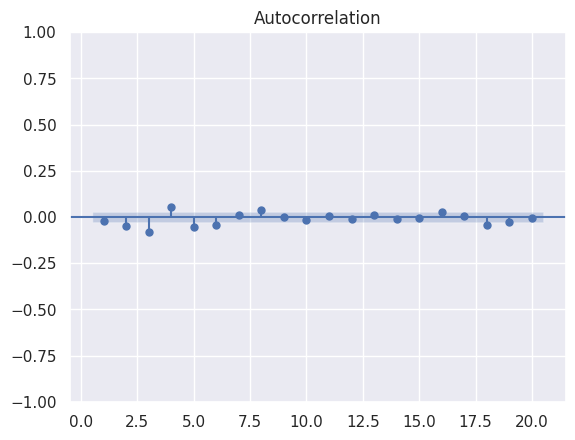

In [341]:
sgt.plot_acf(df.returns[1:], zero=False, lags=20)
plt.show() #no aparece nada porque es un ruido blanco

In [342]:
model_ma_1 = ARIMA(df.market_value, order=(0,0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38396.582
Date:                Wed, 31 May 2023   AIC                          76799.164
Time:                        12:11:56   BIC                          76818.711
Sample:                    01-07-1994   HQIC                         76806.015
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5081.9425     15.815    321.337      0.000    5050.946    5112.939
ma.L1          0.9571      0.004    230.179      0.000       0.949       0.965
sigma2      2.806e+05   8136.333     34.492      0.0

In [343]:
ma_1 = ARIMA(df.returns[1:], order=(0,0,1))
ajuste_ma_1 = ma_1.fit()
print(ajuste_ma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 4991
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7893.080
Date:                Wed, 31 May 2023   AIC                          15792.159
Time:                        12:11:57   BIC                          15811.706
Sample:                    01-10-1994   HQIC                         15799.011
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.016      1.166      0.244      -0.013       0.051
ma.L1         -0.0257      0.009     -3.006      0.003      -0.043      -0.009
sigma2         1.3840      0.014     99.595      0.0

In [344]:
ma_8 = ARIMA(df.returns[1:], order=(0,0,8))
ajuste_ma_8 = ma_8.fit()
print(ajuste_ma_8.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 4991
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7849.209
Date:                Wed, 31 May 2023   AIC                          15718.418
Time:                        12:12:00   BIC                          15783.572
Sample:                    01-10-1994   HQIC                         15741.256
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.015      1.268      0.205      -0.010       0.049
ma.L1         -0.0238      0.009     -2.516      0.012      -0.042      -0.005
ma.L2         -0.0496      0.008     -6.034      0.0

In [345]:
df['res_ret_ma_8'] = ajuste_ma_8.resid[1:]
df.head()

,spx,dax,ftse,nikkei,market_value,wn,rw,res_price,log,dif,dif1,diff_1,diff_2,returns,res_ret_ma_8
date,,,,,,,,,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,5124.926789,1122.139662,-1635.969054,8.144964,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,5381.937657,1080.347860,-8.486285,8.143395,8.144964,-0.001568,-5.40,NaN,-0.156704,NaN
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,5251.354085,1082.095245,-29.945617,8.135573,8.143395,-0.007823,-26.81,-32.21,-0.779229,-0.802435
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,6927.875215,1083.639265,-45.436973,8.123267,8.135573,-0.012305,-41.75,-68.56,-1.222988,-1.269800
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,3098.376519,1067.146255,-17.457301,8.119699,8.123267,-0.003568,-12.01,-53.76,-0.356166,-0.465279


In [346]:
model_ar_1_ma_1 = ARIMA(df.returns[1:], order=(1,0,1))
ajuste_ar_1_ma_1 = model_ar_1_ma_1.fit()
print(ajuste_ar_1_ma_1.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 4991
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7880.022
Date:                Wed, 31 May 2023   AIC                          15768.043
Time:                        12:12:02   BIC                          15794.105
Sample:                    01-10-1994   HQIC                         15777.178
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.015      1.303      0.192      -0.010       0.048
ar.L1          0.7642      0.045     16.881      0.000       0.676       0.853
ma.L1         -0.8135      0.041    -20.053      0.0

In [347]:
model_ar_3_ma_3 = ARIMA(df.returns[1:], order=(3,0,3))
ajuste_ar_3_ma_3 = model_ar_3_ma_3.fit()
print(ajuste_ar_3_ma_3.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 4991
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7857.211
Date:                Wed, 31 May 2023   AIC                          15730.421
Time:                        12:12:11   BIC                          15782.545
Sample:                    01-10-1994   HQIC                         15748.691
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.015      1.298      0.194      -0.010       0.048
ar.L1         -0.1906      0.068     -2.788      0.005      -0.325      -0.057
ar.L2         -0.2901      0.055     -5.234      0.0

In [348]:
LLR_test(ajuste_ar_1_ma_1, ajuste_ar_3_ma_3, DF=4)

0.0

In [349]:
model_ar_3_ma_2 = ARIMA(df.returns[1:], order=(3,0,2))
ajuste_ar_3_ma_2 = model_ar_3_ma_2.fit()
print(ajuste_ar_3_ma_2.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 4991
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7859.329
Date:                Wed, 31 May 2023   AIC                          15732.658
Time:                        12:12:17   BIC                          15778.266
Sample:                    01-10-1994   HQIC                         15748.645
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0192      0.016      1.229      0.219      -0.011       0.050
ar.L1         -0.6732      0.056    -12.130      0.000      -0.782      -0.564
ar.L2         -0.5033      0.064     -7.888      0.0

In [350]:
print('\n ARIMA(1,0,1): \tLL = ', ajuste_ar_1_ma_1.llf, '\tAIC = ', ajuste_ar_1_ma_1.aic)
print('\n ARIMA(3,0,3): \tLL = ', ajuste_ar_3_ma_3.llf, '\tAIC = ', ajuste_ar_3_ma_3.aic)
print('\n ARIMA(3,0,2): \tLL = ', ajuste_ar_3_ma_2.llf, '\tAIC = ', ajuste_ar_3_ma_2.aic)

#se prefiere el que tenga valores menores en valor absoluto (menos verosimilitud)


 ARIMA(1,0,1): 	LL =  -7880.021510146422 	AIC =  15768.043020292844

 ARIMA(3,0,3): 	LL =  -7857.210711001755 	AIC =  15730.42142200351

 ARIMA(3,0,2): 	LL =  -7859.329145068552 	AIC =  15732.658290137104


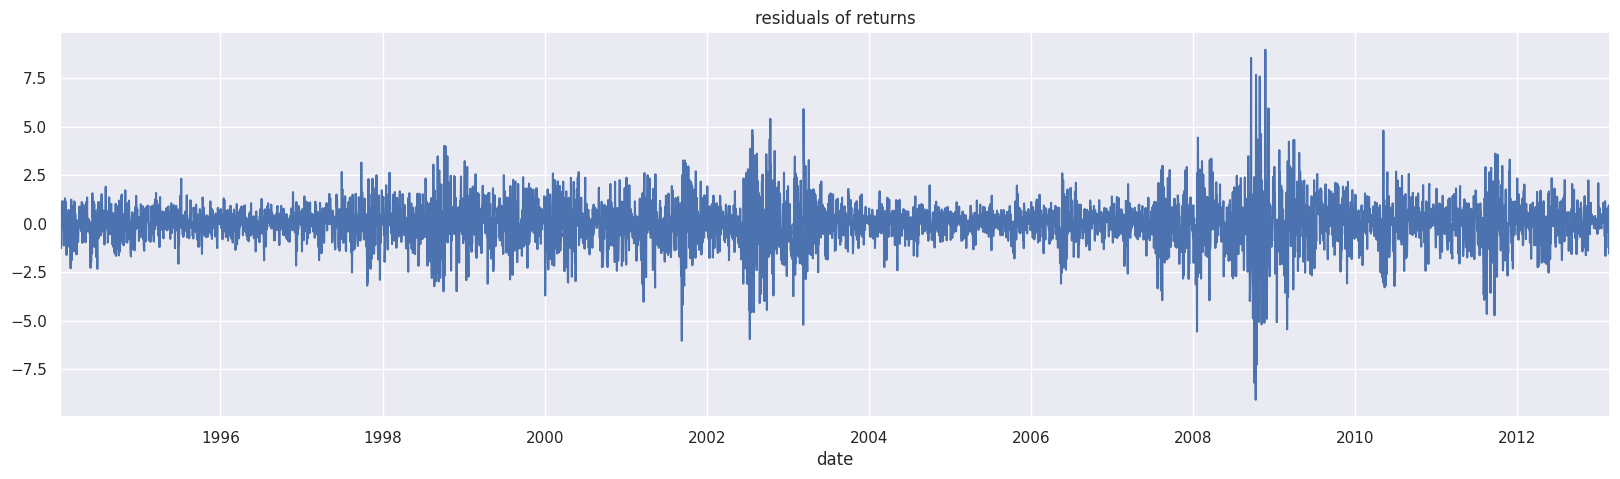

In [351]:
df['res_ret_ar_3_ma_3'] = ajuste_ar_3_ma_3.resid[1:]

df.res_ret_ar_3_ma_3.plot(figsize = (20,5))
plt.title('residuals of returns')
plt.show()

In [352]:
#ARIMA, la diferencia es para hacerla estacionaria (cuando tiene tendencia)

model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
ajuste_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
print(ajuste_ar_1_i_1_ma_3.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -27437.305
Date:                Wed, 31 May 2023   AIC                          54884.611
Time:                        12:12:21   BIC                          54917.188
Sample:                    01-07-1994   HQIC                         54896.029
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3540      0.088     -4.039      0.000      -0.526      -0.182
ma.L1          0.3342      0.087      3.833      0.000       0.163       0.505
ma.L2         -0.0588      0.010     -5.976      0.0

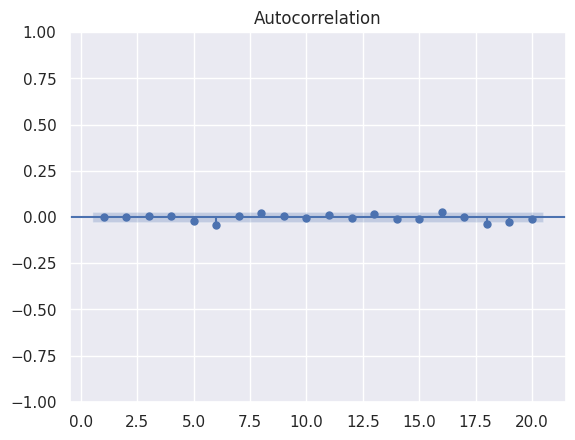

In [353]:
df['res_ar_1_i_1_ma_3'] = ajuste_ar_1_i_1_ma_3.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero=False, lags=20)
plt.show()

#ya las relaciones de errores estan dentro del limite

In [354]:
#ARIMAX es incorporar una variable exogena

model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value,
                                 exog=df.spx,
                                 order=(1,1,1))
ajuste_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
print(ajuste_ar_1_i_1_ma_1_Xspx.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26544.938
Date:                Wed, 31 May 2023   AIC                          53097.877
Time:                        12:12:24   BIC                          53123.938
Sample:                    01-07-1994   HQIC                         53107.012
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6921      0.035     76.188      0.000       2.623       2.761
ar.L1          0.2554      0.029      8.724      0.000       0.198       0.313
ma.L1         -0.5446      0.025    -21.654      0.0

In [355]:
modelo_ARIMAX_1_1_1 = ARIMA(df.market_value,
                                 exog=df[['spx', 'dax', 'nikkei']],
                                 order=(1,1,1))
ajuste_ARIMAX_1_1_1 = modelo_ARIMAX_1_1_1.fit()
print(ajuste_ARIMAX_1_1_1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 4992
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24828.335
Date:                Wed, 31 May 2023   AIC                          49668.671
Time:                        12:12:30   BIC                          49707.763
Sample:                    01-07-1994   HQIC                         49682.373
                         - 02-25-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            0.4412      0.031     14.415      0.000       0.381       0.501
dax            0.5692      0.006    101.705      0.000       0.558       0.580
nikkei         0.0248      0.002     12.003      0.0